# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [134]:
import random 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.utils.fixes import loguniform

%matplotlib inline
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.despine()

<Figure size 432x288 with 0 Axes>

First thing first, let's take a look at the data:

In [235]:
credit_data = pd.read_csv("GermanCredit.csv")
credit_data.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [236]:
credit_data.describe()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.596000,0.963000,0.274000,...,0.13900,0.047000,0.814000,0.179000,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.490943,0.188856,0.446232,...,0.34612,0.211745,0.389301,0.383544,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


Lots going on here - we have a mix of categorical and continuous variables. Hopefully a decision tree will not have a problem with that, so I will leave everything alone for now. Also looks like we have some one hot encoded factors. Let's take a look at our target, the 'Class' column. I want to know if the dataset is balanced or not. But first, let's convert it to binary -1, 1 for SciKit-learn.

In [237]:
def make_label_numeric(row):
    if row['Class'] == 'Good':
        return 1
    
    return -1

credit_data['Class'] = credit_data.apply(lambda row : make_label_numeric(row), axis=1)

In [238]:
good_credit_count = len(credit_data[credit_data["Class"] == 1])
bad_credit_count = len(credit_data) - good_credit_count
print('Good credit observations: {}'.format(good_credit_count))
print('Bad credit observations: {}'.format(bad_credit_count))

Good credit observations: 700
Bad credit observations: 300


Dataset is not balanced, will have to keep this in mind as trees like equal numbers of observations in all classes. May have to come back and stratify or otherwise weight train-test-split so the tree sees equal numbers of good and bad credit observations. For now, let's push ahead with a basic tree and see what happens.

In [239]:
# Your code here! :)

# Helper function to split training data into train and test multiple times
# for average score
def cv_score(clf, x, y, score_func):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [240]:
# Make training and test data
targets = credit_data['Class']
data = credit_data.drop(['Class'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(data.values, targets.values, random_state=5)

**Note:** we will use the average precision-recall score from SciKit-learn as our scoring function because it preforms well when in binary classification where the classes are not balanced. See [Precision-Recall](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py) in the SciKit-learn docs.

In [241]:
# Train the tree using average precision-recall
tree_clf = DecisionTreeClassifier()
tree_clf = tree_clf.fit(x_train, y_train)
score = cv_score(tree_clf, x_train, y_train, average_precision_score)
print('Average precision-recall score: {}'.format(np.round(score, 2)))

Average precision-recall score: 0.74


Ouch, looks like we need to do some hyperparameter optimization. Lets see what we can fiddle with in a DescisionTreeClassifier:

In [242]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

Ok, let's take a look at the docs and see what some of these things are:

1. **ccp_alpha** - complexity cutoff for pruning -> non-negative float
2. **class_weight** - output class weights -> dict, list of dict or “balanced”
3. **criterion** - method to measure quality of split -> {“gini”, “entropy”}
4. **max_depth** - height of tree -> int
5. **max_features** - features to look at when finding best split -> int, float or {“auto”, “sqrt”, “log2”}
6. **max_leaf_nodes** - int
7. **min_impurity_decrease** - threshold required for split -> float
8. **min_impurity_split** - continue to split while above -> float
9. **min_samples_leaf** - minimum samples allowed in a leaf -> int
10. **min_samples_split** - minimum observations required for further splitting -> int
11. **min_weight_fraction_leaf** - not sure I understand this one -> float
12. **presort** - deprecated 
13. **random_state** - seed for random number generator -> int
14. **splitter** - splitting method -> {“best”, “random”}

Since this is my first brush with this, I will err on the side of throwing everything at the wall to see what sticks. We will again use 14 threads on the cluster headnode to preform a randomized search over hyperparameter space.

Note: hyperparameter search space was delineated by holding all but one variable constant and looking at a large range of values to get a feeling for what a reasonable range should be.

In [243]:
# initalize classifier
tree_clf = DecisionTreeClassifier()

# hyperparameter distributions
param_dist = {}
param_dist = {'max_depth': loguniform(2, 20),
              'max_leaf_nodes': range(2,1000),
              'min_impurity_decrease': loguniform(1e-4,1e-1),
              'min_samples_leaf': range(1,1000),
              }

# search settings
n_iter_search = 10000
num_jobs = 14

# set up random search with average precision-recall scorer
random_search = RandomizedSearchCV(tree_clf, 
                                   param_distributions=param_dist,
                                   scoring=make_scorer(average_precision_score),
                                   n_iter=n_iter_search,
                                   n_jobs=num_jobs)
# run and time search
start = time()
best_model = random_search.fit(x_train, y_train)
print("RandomizedSearchCV took %.f min. for %d candidate"
      " parameter settings." % (((time() - start)/60), n_iter_search))

RandomizedSearchCV took 1 min. for 10000 candidate parameter settings.


OK, not bad for 10,000 iterations! Let's take a look at how the scores vary across hyperparameter space. Note: this is a bit sketchy because we are varying multiple things at the same time but hopefully we can get some idea of whether or not our search is doing anything.

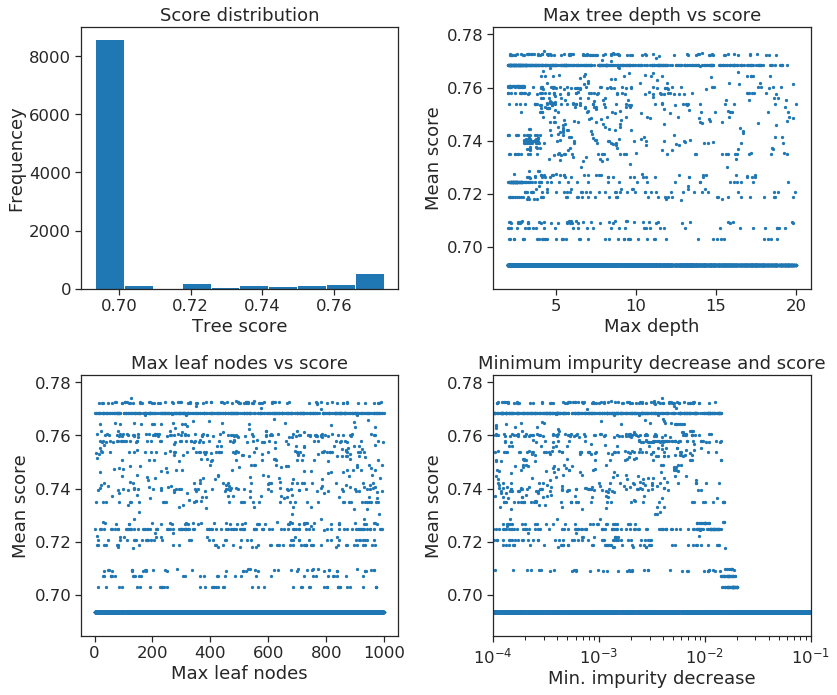

In [244]:
results = pd.DataFrame(random_search.cv_results_).dropna()

plt.subplots(2,2,figsize=(12,10))

plt.subplot(2, 2, 1)
plt.hist(results.mean_test_score)
plt.title("Score distribution")
plt.xlabel("Tree score")
plt.ylabel("Frequencey")

plt.subplot(2, 2, 2)
plt.scatter(results.param_max_depth, results.mean_test_score, s=5)
plt.xlabel("Max depth")
plt.ylabel("Mean score")
plt.title("Max tree depth vs score")

plt.subplot(2, 2, 3)
plt.scatter(results.param_max_leaf_nodes, results.mean_test_score, s=5)
plt.xlabel("Max leaf nodes")
plt.ylabel("Mean score")
plt.title("Max leaf nodes vs score")

plt.subplot(2, 2, 4)
plt.scatter(results.param_min_impurity_decrease, results.mean_test_score, s=5)
plt.xlabel("Min. impurity decrease")
plt.ylabel("Mean score")
plt.title("Minimum impurity decrease and score")
plt.xscale('log')
plt.xlim(1e-4,1e-1)

plt.tight_layout()
plt.show()

The max depth plot is blowing my mind. Don't want to read too deeply because of the multiple factors being varied at the same time. But, it seems to say a tree of depth 2 can do just fine while there are slightly more better trees at depth 3. I wonder if I am over fitting...

**Observations:**
1. Scores range between ~0.7 and 0.8 and seem to fall mostly into three common bins.
2. The tree does not need to have a large max depth to work just fine - trees in the 2 - 4 range are perfectly capable of achieving the highest observed scores.
3. Max leaf nodes does not need to be large either - below 200 works just as well as higher values.
4. Minimum impurity decrease seems to be the most sensitive hyperparameter - above about 0.02 all trees preform poorly. Below that performance is similar down to 10<sup>-10</sup>.

Let's take a look at the winning tree and see how it does with the test data.

In [245]:
winners = results[results['rank_test_score'] == results['rank_test_score'].min()]
winners

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_impurity_decrease,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2358,0.001666,0.000054,0.000736,0.00001,4.27537,125,0.00393046,53,"{'max_depth': 4.2753660936152045, 'max_leaf_no...",0.802569,0.786278,0.743682,0.787691,0.749459,0.773936,0.023133,1


In [185]:
score = average_precision_score(best_model.predict(x_test), y_test)
print('Average precision-recall score, test set: {}'.format(np.round(score,2)))

Average precision-recall score: 0.73


Does a bit worse on the test data. It would be interesting to see how well the second or third runner up does on the test data...

In [248]:
runners_up = results[results['rank_test_score'] == (results['rank_test_score'].min() + 3)]
runners_up

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_impurity_decrease,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
106,0.001125,0.000035,0.000734,0.000016,5.86629,386,0.000878866,160,"{'max_depth': 5.86628924749058, 'max_leaf_node...",0.781029,0.780528,0.787943,0.742185,0.772186,0.772774,0.01609,4
422,0.001122,0.000019,0.000728,0.000004,10.5942,156,0.00542231,156,"{'max_depth': 10.594227443227663, 'max_leaf_no...",0.781029,0.780528,0.787943,0.742185,0.772186,0.772774,0.01609,4
655,0.001102,0.000003,0.000734,0.000008,3.47244,299,0.00310707,159,"{'max_depth': 3.4724355076123117, 'max_leaf_no...",0.781029,0.780528,0.787943,0.742185,0.772186,0.772774,0.01609,4
785,0.001123,0.000020,0.000734,0.000006,4.16136,72,0.000456791,157,"{'max_depth': 4.161357972956979, 'max_leaf_nod...",0.781029,0.780528,0.787943,0.742185,0.772186,0.772774,0.01609,4
846,0.001147,0.000069,0.000763,0.000046,6.0771,820,0.000573284,156,"{'max_depth': 6.077098637918254, 'max_leaf_nod...",0.781029,0.780528,0.787943,0.742185,0.772186,0.772774,0.01609,4
1069,0.001103,0.000009,0.000723,0.000002,4.15668,105,0.000285952,158,"{'max_depth': 4.156684161216189, 'max_leaf_nod...",0.781029,0.780528,0.787943,0.742185,0.772186,0.772774,0.01609,4
1076,0.001116,0.000028,0.000738,0.000010,8.46479,990,0.000720268,156,"{'max_depth': 8.464787377819732, 'max_leaf_nod...",0.781029,0.780528,0.787943,0.742185,0.772186,0.772774,0.01609,4
1104,0.001302,0.000249,0.000834,0.000161,3.9001,436,0.000635622,159,"{'max_depth': 3.9000999387019775, 'max_leaf_no...",0.781029,0.780528,0.787943,0.742185,0.772186,0.772774,0.01609,4
1384,0.001122,0.000026,0.000731,0.000005,3.50381,329,0.000135354,157,"{'max_depth': 3.5038085507510828, 'max_leaf_no...",0.781029,0.780528,0.787943,0.742185,0.772186,0.772774,0.01609,4
1816,0.001101,0.000011,0.000726,0.000002,13.2019,457,0.00111287,160,"{'max_depth': 13.201869526993875, 'max_leaf_no...",0.781029,0.780528,0.787943,0.742185,0.772186,0.772774,0.01609,4


OK, so these are all third place finishers with a score of 0.77. Let's take one of the shallower trees and use its hyperparameter settings to retrain and then test. How about 9749 - max depth of 3.3 and 74 max leaf nodes.

In [249]:
# Train the tree using average precision-recall as scoring function and our optimized hyperparameters
tree_clf = DecisionTreeClassifier(
            max_depth=3.3,
            max_leaf_nodes=74,
            min_impurity_decrease=0.00005,
            min_samples_leaf=157)

tree_clf = tree_clf.fit(x_train, y_train)
score = cv_score(tree_clf, x_train, y_train, average_precision_score)
print('Average precision-recall score, training set: {}'.format(np.round(score, 2)))

Average precision-recall score, training set: 0.8


In [250]:
score = cv_score(tree_clf, x_test, y_test, average_precision_score)
print('Average precision-recall score, test set: {}'.format(np.round(score, 2)))

Average precision-recall score, test set: 1.0


That has to be some kind of mistake...

Also noticed something strange when playing with the hyperparameter distributions - If I don't set min. samples per leaf, the high performing shallow trees go away. Watch this...

In [195]:
# initalize classifier
tree_clf = DecisionTreeClassifier()

# hyperparameter distributions
param_dist = {}
param_dist = {'max_depth': loguniform(2, 20),
              'max_leaf_nodes': range(2,1000),
              'min_impurity_decrease': loguniform(1e-4,1e-1),
              #'min_samples_leaf': range(1,1000),
              }

# search settings
n_iter_search = 10000
num_jobs = 14

# set up random search with average precision-recall scorer
random_search = RandomizedSearchCV(tree_clf, 
                                   param_distributions=param_dist,
                                   scoring=make_scorer(average_precision_score),
                                   n_iter=n_iter_search,
                                   n_jobs=num_jobs)
# run and time search
start = time()
best_model = random_search.fit(x_train, y_train)
print("RandomizedSearchCV took %.f min. for %d candidate"
      " parameter settings." % (((time() - start)/60), n_iter_search))

RandomizedSearchCV took 1 min. for 10000 candidate parameter settings.


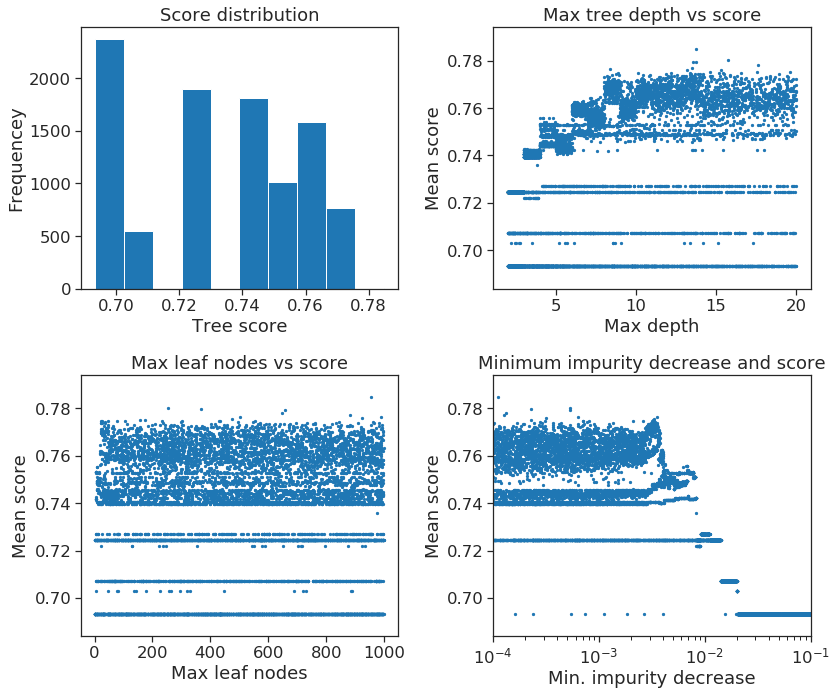

In [196]:
results = pd.DataFrame(random_search.cv_results_).dropna()

plt.subplots(2,2,figsize=(12,10))

plt.subplot(2, 2, 1)
plt.hist(results.mean_test_score)
plt.title("Score distribution")
plt.xlabel("Tree score")
plt.ylabel("Frequencey")

plt.subplot(2, 2, 2)
plt.scatter(results.param_max_depth, results.mean_test_score, s=5)
plt.xlabel("Max depth")
plt.ylabel("Mean score")
plt.title("Max tree depth vs score")

plt.subplot(2, 2, 3)
plt.scatter(results.param_max_leaf_nodes, results.mean_test_score, s=5)
plt.xlabel("Max leaf nodes")
plt.ylabel("Mean score")
plt.title("Max leaf nodes vs score")

plt.subplot(2, 2, 4)
plt.scatter(results.param_min_impurity_decrease, results.mean_test_score, s=5)
plt.xlabel("Min. impurity decrease")
plt.ylabel("Mean score")
plt.title("Minimum impurity decrease and score")
plt.xscale('log')
plt.xlim(1e-4,1e-1)

plt.tight_layout()
plt.show()

In [197]:
winners = results[results['rank_test_score'] == results['rank_test_score'].min()]
winners

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_impurity_decrease,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6923,0.003838,0.000184,0.000732,0.00004,13.7478,955,0.000110502,"{'max_depth': 13.747764919197035, 'max_leaf_no...",0.805217,0.782401,0.790571,0.768722,0.776927,0.784768,0.012461,1


In [198]:
score = average_precision_score(best_model.predict(x_test), y_test)
print('Average precision-recall score: {}'.format(np.round(score,2)))

Average precision-recall score: 0.76


OK, last thing I want to try is resampling of the minor class so that we have equal numbers of good and bad credit observations in the training data.

In [253]:
# Make training and test data again
targets = credit_data['Class']
data = credit_data.drop(['Class'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(data, targets, random_state=5)

# concatenate our training data back together
training_data = pd.concat([pd.DataFrame(x_train), pd.DataFrame(y_train)], axis=1)

# separate minority and majority classes
good_credit = training_data[training_data['Class'] == 1]
bad_credit = training_data[training_data['Class'] == -1]

# resample bad credit so we have the same number of observations in each class
bad_credit_upsampled = resample(bad_credit,
                          replace=True, 
                          n_samples=len(good_credit), 
                          random_state=5)

# combine and split to x and y
upsampled = pd.concat([good_credit, bad_credit_upsampled])
y_train = upsampled['Class'].values
x_train = upsampled.drop('Class', axis=1).values

In [261]:
# Train the tree using average precision-recall as scoring function and our optimized hyperparameters
tree_clf = DecisionTreeClassifier(
            max_depth=3.3,
            max_leaf_nodes=74,
            min_impurity_decrease=0.00005,
            min_samples_leaf=157)

tree_clf = tree_clf.fit(x_train, y_train)
score = cv_score(tree_clf, x_train, y_train, average_precision_score)
print('Average precision-recall score: {}'.format(np.round(score, 2)))

Average precision-recall score: 0.53


In [262]:
score = average_precision_score(tree_clf.predict(x_test), y_test)
print('Average precision-recall score, test set: {}'.format(np.round(score,2)))

Average precision-recall score, test set: 0.79


Interesting, it does much worse on the training set, but the test set score is similar to without resampling. Let's try rerunning the hyperparameter optimization on the resampled data:

In [256]:
# initalize classifier
tree_clf = DecisionTreeClassifier()

# hyperparameter distributions
param_dist = {}
param_dist = {'max_depth': loguniform(2, 20),
              'max_leaf_nodes': range(2,1000),
              'min_impurity_decrease': loguniform(1e-4,1e-1),
              'min_samples_leaf': range(1,1000)
              }

# search settings
n_iter_search = 10000
num_jobs = 14

# set up random search with average precision-recall scorer
random_search = RandomizedSearchCV(tree_clf, 
                                   param_distributions=param_dist,
                                   scoring=make_scorer(average_precision_score),
                                   n_iter=n_iter_search,
                                   n_jobs=num_jobs)
# run and time search
start = time()
best_model = random_search.fit(x_train, y_train)
print("RandomizedSearchCV took %.f min. for %d candidate"
      " parameter settings." % (((time() - start)/60), n_iter_search))

RandomizedSearchCV took 1 min. for 10000 candidate parameter settings.


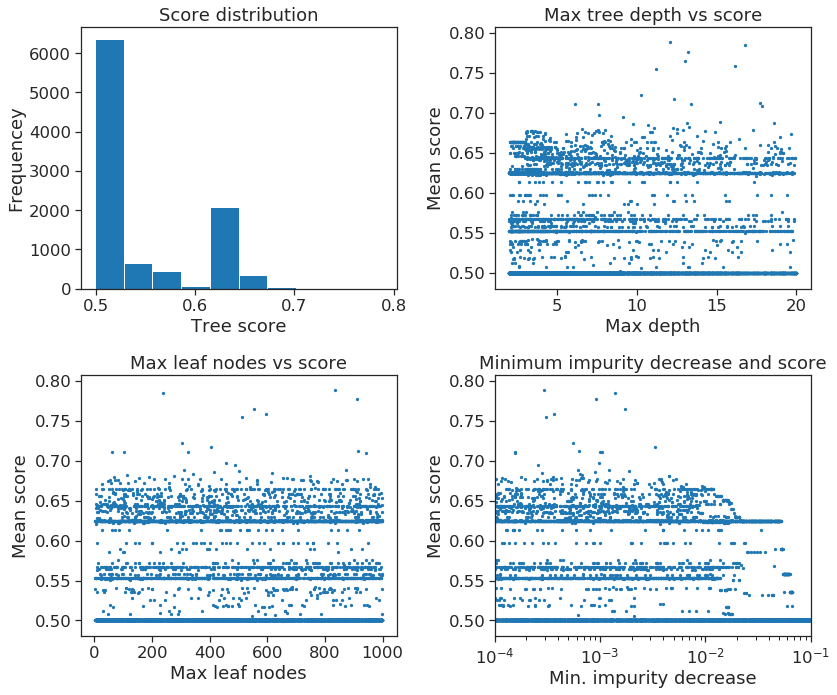

In [257]:
results = pd.DataFrame(random_search.cv_results_).dropna()

plt.subplots(2,2,figsize=(12,10))

plt.subplot(2, 2, 1)
plt.hist(results.mean_test_score)
plt.title("Score distribution")
plt.xlabel("Tree score")
plt.ylabel("Frequencey")

plt.subplot(2, 2, 2)
plt.scatter(results.param_max_depth, results.mean_test_score, s=5)
plt.xlabel("Max depth")
plt.ylabel("Mean score")
plt.title("Max tree depth vs score")

plt.subplot(2, 2, 3)
plt.scatter(results.param_max_leaf_nodes, results.mean_test_score, s=5)
plt.xlabel("Max leaf nodes")
plt.ylabel("Mean score")
plt.title("Max leaf nodes vs score")

plt.subplot(2, 2, 4)
plt.scatter(results.param_min_impurity_decrease, results.mean_test_score, s=5)
plt.xlabel("Min. impurity decrease")
plt.ylabel("Mean score")
plt.title("Minimum impurity decrease and score")
plt.xscale('log')
plt.xlim(1e-4,1e-1)

plt.tight_layout()
plt.show()

In [258]:
winner = results[results['rank_test_score'] == results['rank_test_score'].min()]
winner

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_impurity_decrease,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7567,0.005082,0.000137,0.000752,0.000013,12.0694,834,0.000291381,2,"{'max_depth': 12.069445183118631, 'max_leaf_no...",0.755178,0.747748,0.799015,0.808528,0.830948,0.788283,0.031889,1


In [260]:
score = average_precision_score(best_model.predict(x_test), y_test)
print('Average precision-recall score: {}'.format(np.round(score,2)))

Average precision-recall score: 0.77


This one actually looks best to me - good scores and training and test scores are similar. Disregarding the score of 1.0 from the first optimizations runner up I would stick with this mode for prediction on novel data.

### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [ ]:
! pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [ ]:
# Your code here! :)

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Your code here! :)

As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [ ]:
# Your code here

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [ ]:
! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [ ]:
# Your code here!

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
! conda install -c anaconda py-xgboost

In [ ]:
! conda install -c conda-forge catboost

In [ ]:
! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)